In [1]:
import tensorflow as tf
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [2]:
# tf.config.list_physical_devices()
[k.device_type for k in tf.config.list_physical_devices()]

['CPU']

# Import data

In [3]:
def lastsplit(string_to_split, delimiter = '_') :
    liste = string_to_split.split(delimiter)
    liste.pop()
    return ' '.join(liste)

In [4]:
lastsplit('Albrecht_Dürer_1.jpg', '_')

'Albrecht Dürer'

In [5]:
path_images_lq = './images_lq/'

list_filenames = os.listdir(path_images_lq)

list_labels = []
for filename in list_filenames :
    list_labels.append(lastsplit(filename, '_'))

In [6]:
#Test que l'on a pas fait n'importe quoi
for i, filename in enumerate(list_filenames) :
    if list_labels[i] != lastsplit(filename, '_') :
        print('Problème...')

In [8]:
df = pd.DataFrame({
    'filename': list_filenames,
    'label': list_labels
})
#TODO mettre les images et les labels dans un df
#puis split le df en train et test

In [9]:
labels = np.unique(df['label'])
print(labels)
print(len(labels))

['Albrecht Dürer' 'Alfred Sisley' 'Amedeo Modigliani' 'Andrei Rublev'
 'Andy Warhol' 'Camille Pissarro' 'Caravaggio' 'Claude Monet'
 'Diego Rivera' 'Diego Velazquez' 'Edgar Degas' 'Edouard Manet'
 'Edvard Munch' 'El Greco' 'Eugene Delacroix' 'Francisco Goya'
 'Frida Kahlo' 'Georges Seurat' 'Giotto di Bondone' 'Gustav Klimt'
 'Gustave Courbet' 'Henri Matisse' 'Henri Rousseau'
 'Henri de Toulouse-Lautrec' 'Hieronymus Bosch' 'Jackson Pollock'
 'Jan van Eyck' 'Joan Miro' 'Kazimir Malevich' 'Leonardo da Vinci'
 'Marc Chagall' 'Michelangelo' 'Mikhail Vrubel' 'Pablo Picasso'
 'Paul Cezanne' 'Paul Gauguin' 'Paul Klee' 'Peter Paul Rubens'
 'Pierre-Auguste Renoir' 'Piet Mondrian' 'Pieter Bruegel' 'Raphael'
 'Rembrandt' 'Rene Magritte' 'Salvador Dali' 'Sandro Botticelli' 'Titian'
 'Vasiliy Kandinskiy' 'Vincent van Gogh' 'William Turner']
50


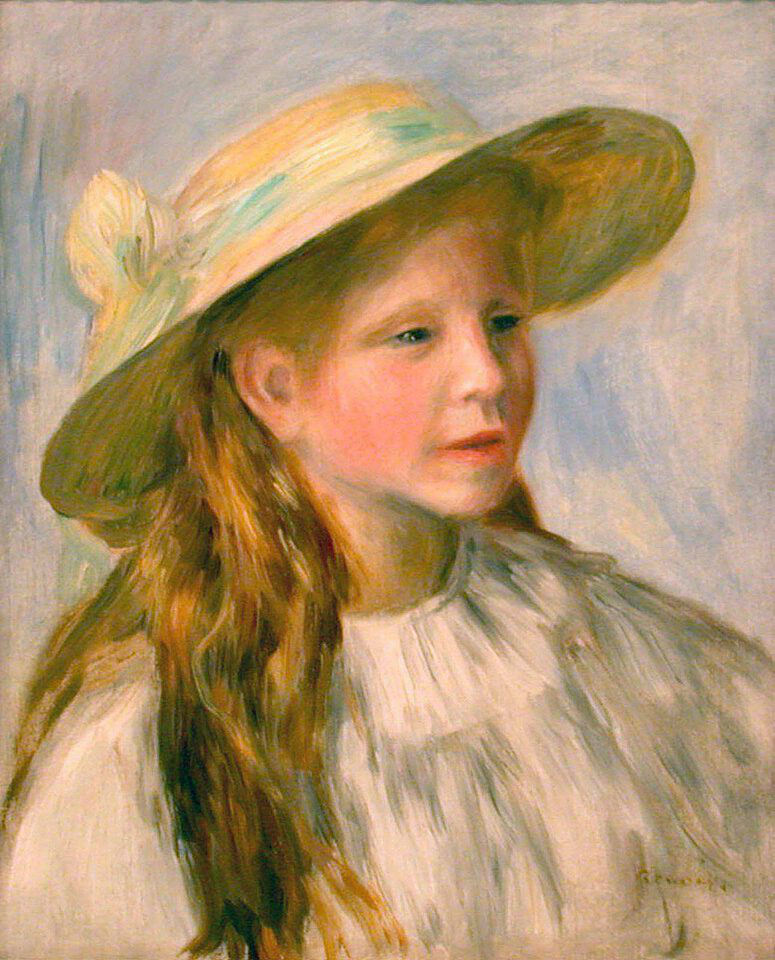

Peintre : Pierre-Auguste Renoir


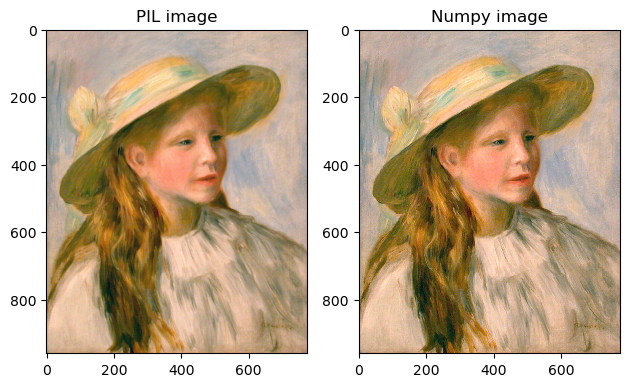

In [10]:
from tensorflow.keras.utils import load_img, img_to_array

random_index = rd.randint(0,len(df)-1)
filename = df['filename'][random_index]
label = df['label'][random_index]

img = load_img(path_images_lq + filename)

display(img)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("PIL image")

plt.subplot(1,2,2)
x = img_to_array(img)
plt.imshow(x/255, interpolation='nearest')
plt.title("Numpy image")

print('Peintre :', label)

plt.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["label"])

N_train = len(df_train)
N_test = len(df_test)

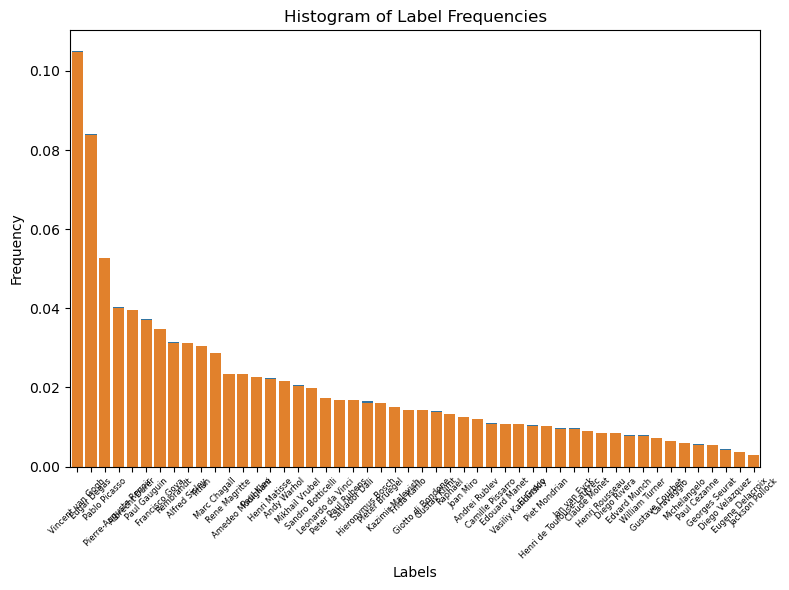

In [65]:
import seaborn as sns

label_counts = df_train["label"].value_counts(normalize=True)
label_counts2 = df_test["label"].value_counts(normalize=True)

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
sns.barplot(x=label_counts2.index, y=label_counts2.values)

plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Label Frequencies')
plt.xticks(rotation=45, size=6)
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
heights = np.zeros(N_train)
widths = np.zeros(N_train)

for i, filename in enumerate(df_train['filename']):
    image = load_img(path_images_lq + filename)
    heights[i], widths[i] = img_to_array(image).shape[:2]

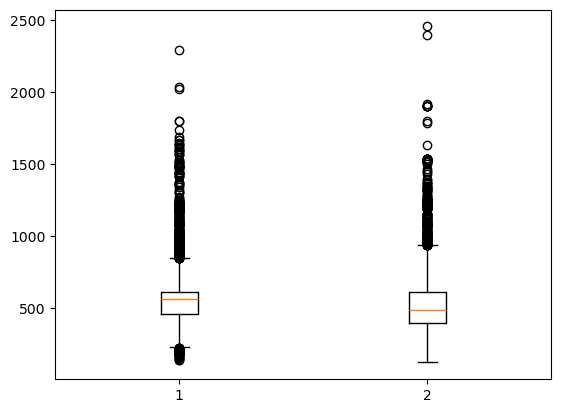

In [15]:
plt.figure()
plt.boxplot([heights,widths])
plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
batch_size = 20  # divider of N_train and N_validation
img_width = 256
img_height = 256

# Training images
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    path_images_lq,
    x_col = 'filename',
    y_col = 'label',
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    batch_size = batch_size
)

# Validation images ? 
#validation_datagen = ImageDataGenerator(rescale=1./255)
#validation_generator = validation_datagen.flow_from_dataframe(
#    df_validation,
#    path,
#    x_col = 'filename',
#    y_col = 'category',
#    class_mode = 'categorical',
#    target_size = (img_width, img_height),
#    batch_size = batch_size
#)

# Test images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    path_images_lq,
    x_col = 'filename',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (img_width, img_height),
    batch_size = batch_size
)

Found 6684 validated image filenames belonging to 50 classes.
Found 1671 validated image filenames belonging to 50 classes.


In [58]:
artists = pd.read_csv("artists.csv")[["name"]].sort_values(by="name").reset_index(drop=True).to_dict()

artists

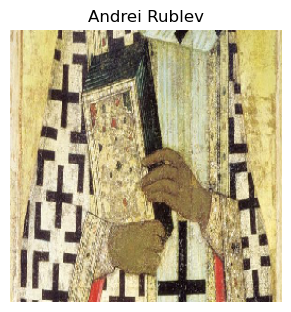

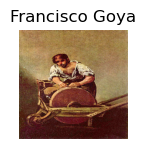

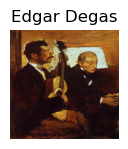

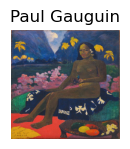

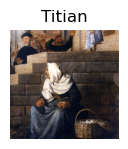

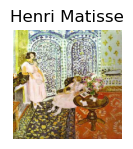

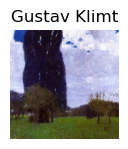

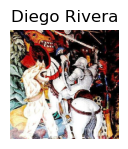

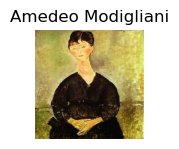

In [72]:
plt.figure(figsize=(12, 12))

for i in range(0,9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in train_generator:
        plt.imshow(x_batch[0])
        plt.title(labels[np.argmax(y_batch)])
        plt.axis('off')
        plt.grid(False)
        plt.show()
        break

In [79]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

cnn_simple = Sequential()
cnn_simple.add(Input(shape=(img_width,img_height,3)))

cnn_simple.add(Conv2D(32, (3,3), activation='relu'))
cnn_simple.add(MaxPooling2D(pool_size=(2,2)))

cnn_simple.add(Conv2D(64, (3,3), activation='relu'))
cnn_simple.add(MaxPooling2D(pool_size=(2,2)))

cnn_simple.add(Conv2D(96, (3,3), activation='relu'))
cnn_simple.add(MaxPooling2D(pool_size=(2,2)))

#cnn_simple.add(Conv2D(128, (3,3), activation='relu'))
#cnn_simple.add(MaxPooling2D(pool_size=(2,2)))

cnn_simple.add(Flatten())
# cnn_simple.add(Dense(512, activation='relu'))
cnn_simple.add(Dense(64, activation='relu'))
cnn_simple.add(Dropout(0.5))
cnn_simple.add(Dense(50, activation='softmax'))


cnn_simple.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     5,529,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,607,698 (21.39 MB)

 Trainable params: 5,607,698 (21.39 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
cnn_simple.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=3e-4),
    metrics = ['accuracy'])

In [87]:
epochs = 10

import time

t_learning_cnn_simple = time.time()
cnn_simple_history = cnn_simple.fit(
    train_generator,
    validation_data = test_generator,
    epochs = epochs
)
t_learning_cnn_simple = time.time() - t_learning_cnn_simple

print("Learning time for %d epochs : %d seconds" % (epochs, t_learning_cnn_simple))

Epoch 1/10


/home/richaume/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 93/335 ━━━━━━━━━━━━━━━━━━━━ 2:52 712ms/step - accuracy: 0.0408 - loss: 3.9178

KeyboardInterrupt: 